In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from yellowbrick.regressor import ResidualsPlot
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('./vehicles.csv')
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7307730503,https://auburn.craigslist.org/cto/d/opelika-ha...,auburn,https://auburn.craigslist.org,9500,2003.0,chrysler,town & country,excellent,6 cylinders,...,fwd,mid-size,mini-van,blue,https://images.craigslist.org/00w0w_41YO8cHlW3...,2003 Chrysler Town and Country Handicapped Acc...,NaN,al,32.614209,-85.326357
1,7307218858,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,...,fwd,NaN,other,white,https://images.craigslist.org/00c0c_kXhBir3Ii6...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000
2,7307164168,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,16590,2013.0,lincoln,mkz sedan 4d,good,NaN,...,fwd,NaN,sedan,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000
3,7307164193,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28990,2017.0,gmc,acadia slt-1 sport utility,good,6 cylinders,...,fwd,NaN,other,NaN,https://images.craigslist.org/00w0w_b3G8mxfApI...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000
4,7307142186,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,20590,2017.0,lincoln,mkz premiere sedan 4d,good,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00F0F_ghX7UUlnBr...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000


In [3]:
data.shape

(441396, 25)

# Visualization

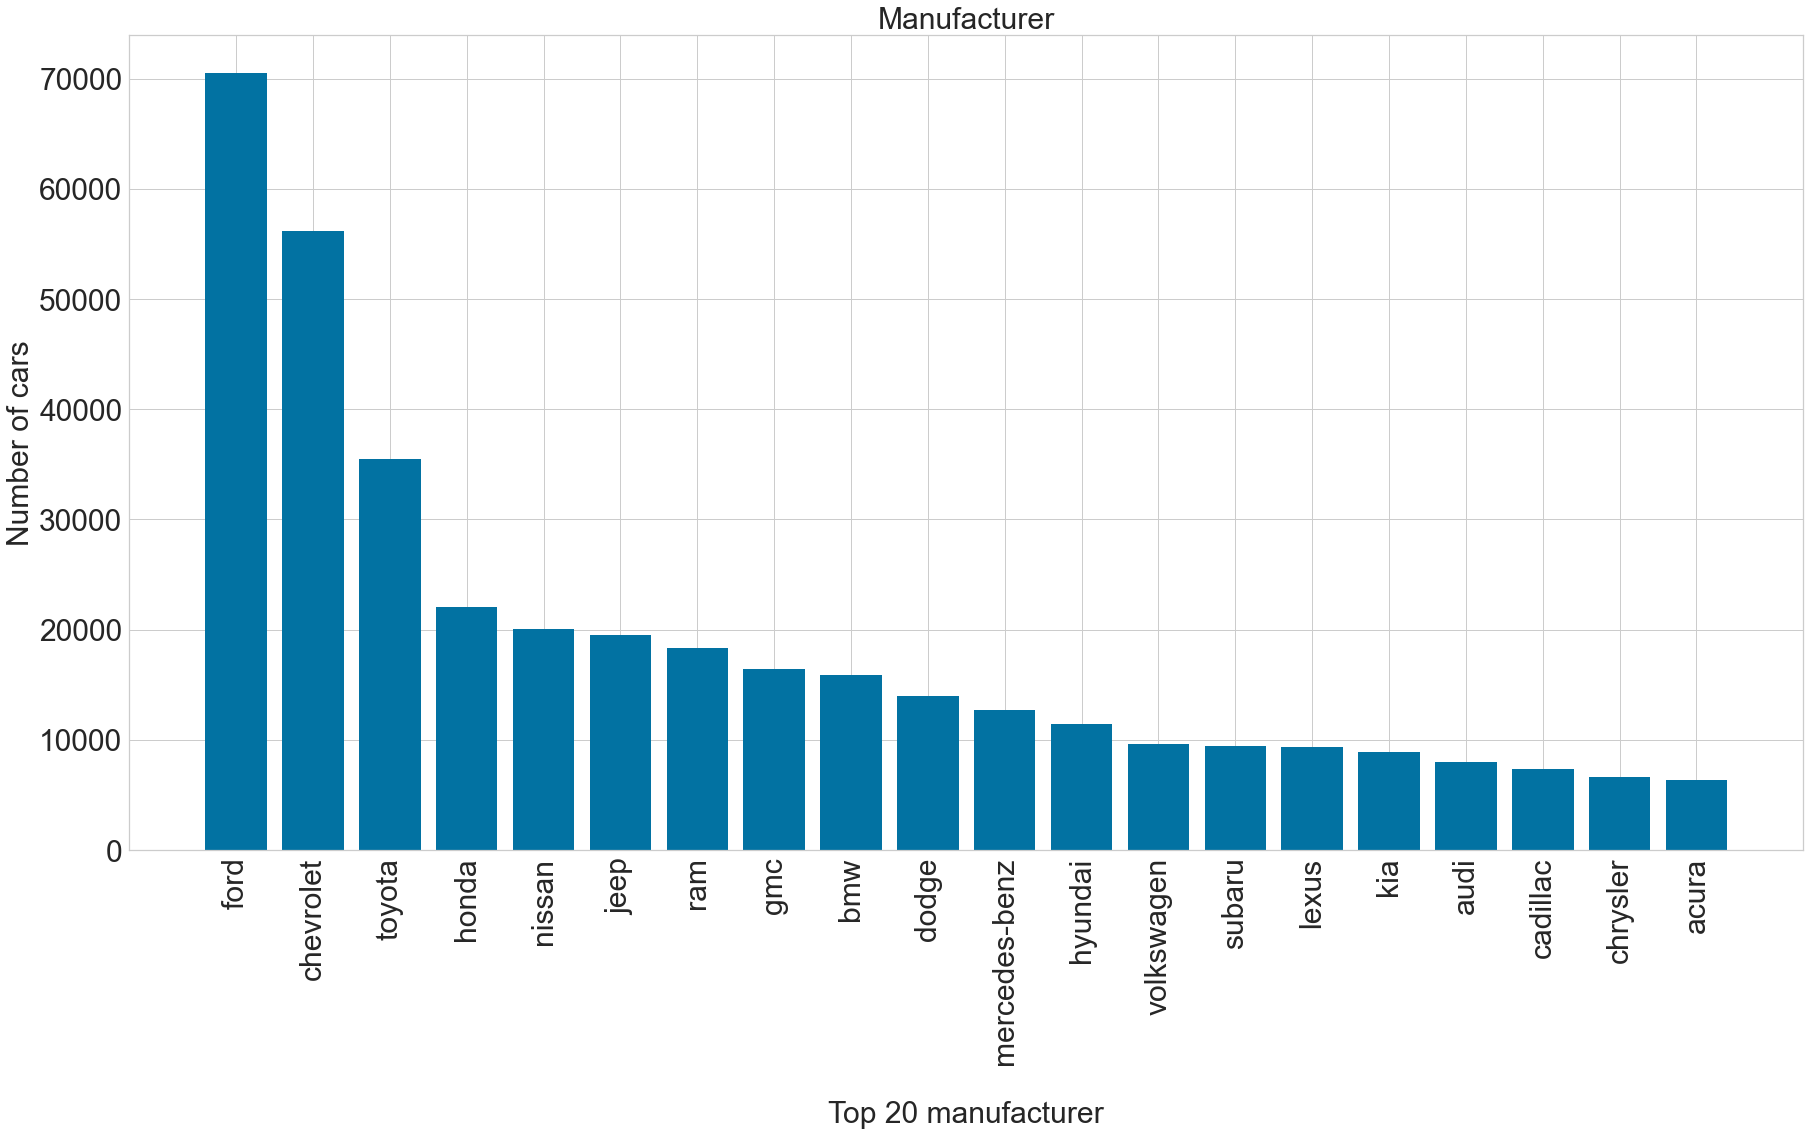

In [4]:
# Top 20 manufacturers 
manufacturers = data.groupby('manufacturer').id.count().sort_values(ascending=False).head(20)
plt.figure(figsize=(30, 15))
plt.bar(manufacturers.index, manufacturers.values);
plt.xticks( rotation='vertical', fontsize=30);
plt.yticks(fontsize=30)
plt.ylabel('Number of cars', fontsize=30);
plt.xlabel('\nTop 20 manufacturer', fontsize=30)
plt.title('Manufacturer', fontsize=30);

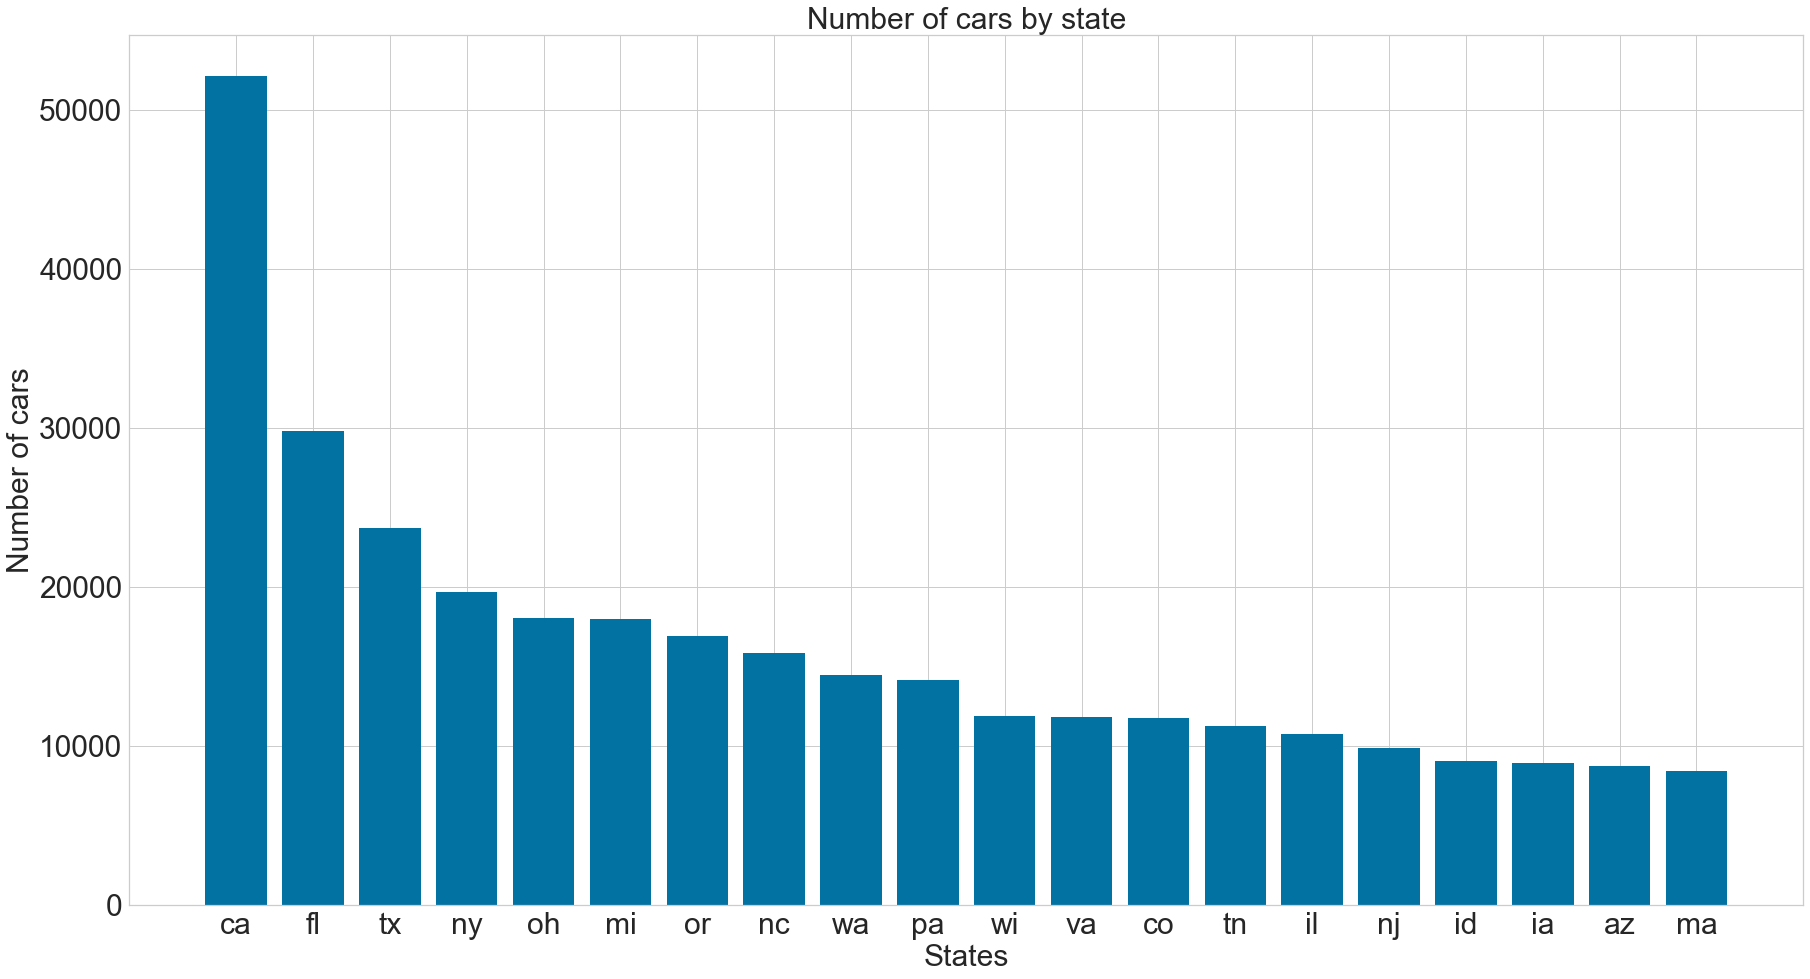

In [5]:
# Car Distribution per state 
state = data.groupby('state').id.count().sort_values(ascending=False).head(20)
plt.figure(figsize=(30, 16))
plt.bar(state.index, state.values);
plt.ylabel('Number of cars',fontsize=30);
plt.xlabel('States', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Number of cars by state', fontsize=30);

Text(0, 0.5, 'Count')

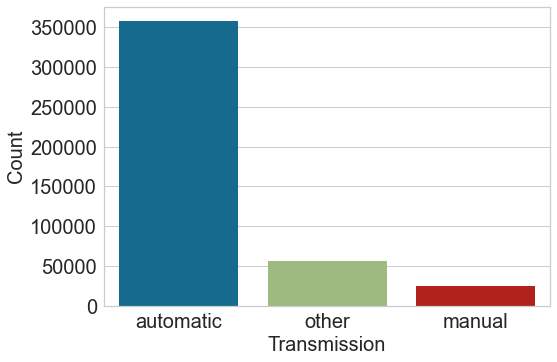

In [6]:
#Transmission v/s  Count 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
b = sns.countplot(x="transmission", data=data)
b.set_xlabel('Transmission', fontsize=20)
b.set_ylabel('Count', fontsize=20)

Text(0, 0.5, 'Count')

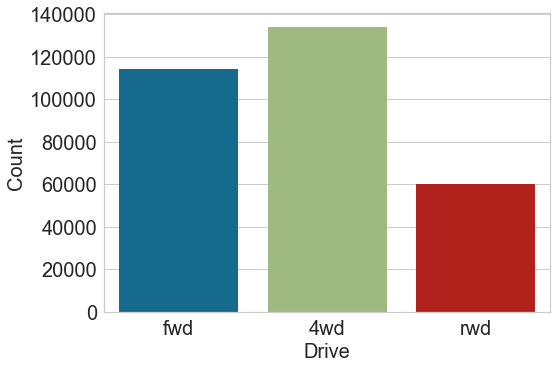

In [7]:
# Drive v/s Count
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
b = sns.countplot(x="drive", data=data)
b.set_xlabel('Drive', fontsize=20)
b.set_ylabel('Count', fontsize=20)

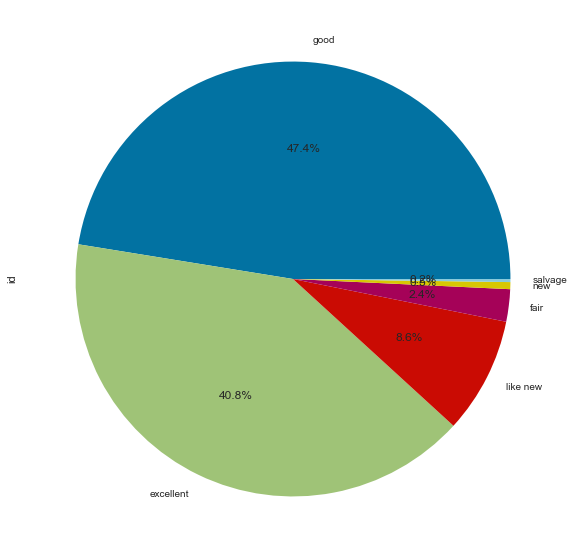

In [8]:
# Distribution of cars in the dataset on the basis of their condition
types = data.groupby('condition').id.count().sort_values(ascending=False)
plt.figure(figsize=[10,10])
types.plot.pie(autopct="%.1f%%");

Text(0, 0.5, 'Price')

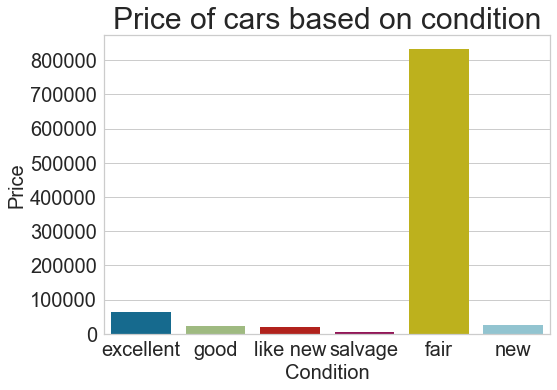

In [9]:
# Condition v/s Price

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Condition', fontsize=20)
plt.ylabel('Price', fontsize=20)
b =sns.barplot(x=data["condition"], y=data['price'], data=data, ci=None)
plt.title('Price of cars based on condition', fontsize=30)
b.set_xlabel('Condition', fontsize=20)
b.set_ylabel('Price', fontsize=20)

Text(0, 0.5, 'Count')

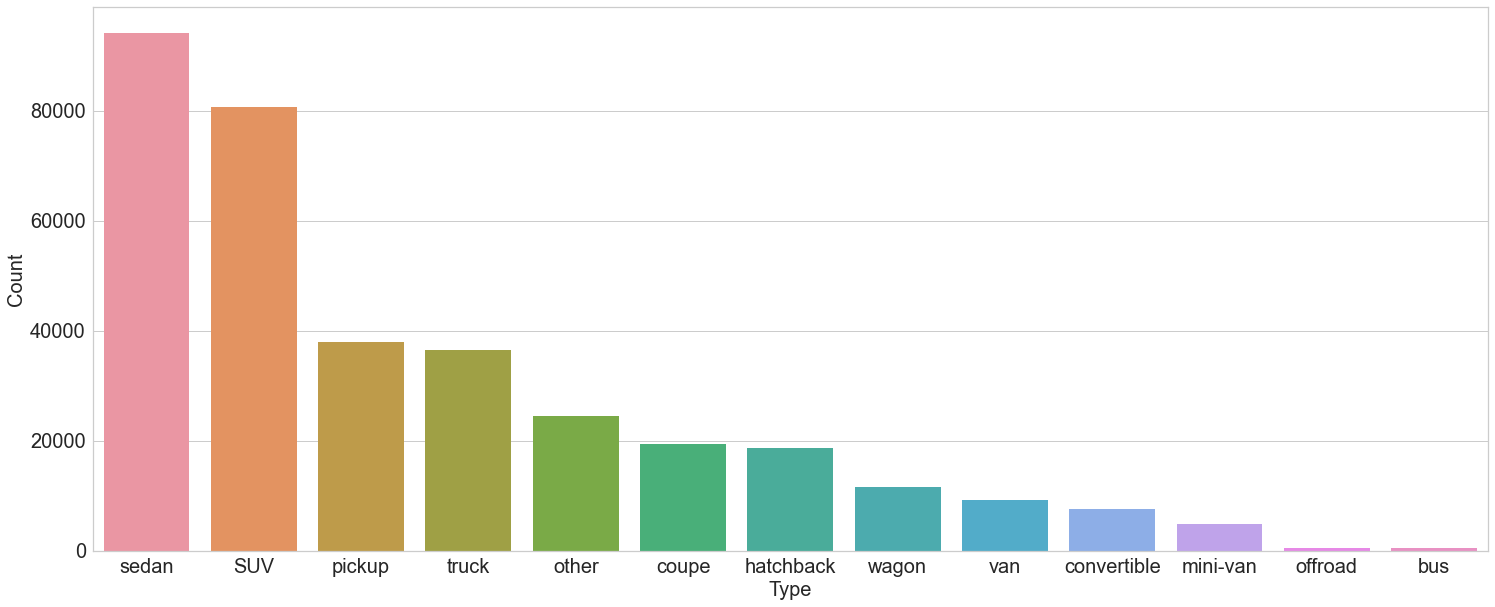

In [10]:
# Type v/s Count 

plt.figure(figsize=(25,10))
b=sns.countplot(x='type', data=data, order = data['type'].value_counts().index)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
b.set_xlabel('Type', fontsize=20)
b.set_ylabel('Count', fontsize=20)

Text(0, 0.5, 'Price')

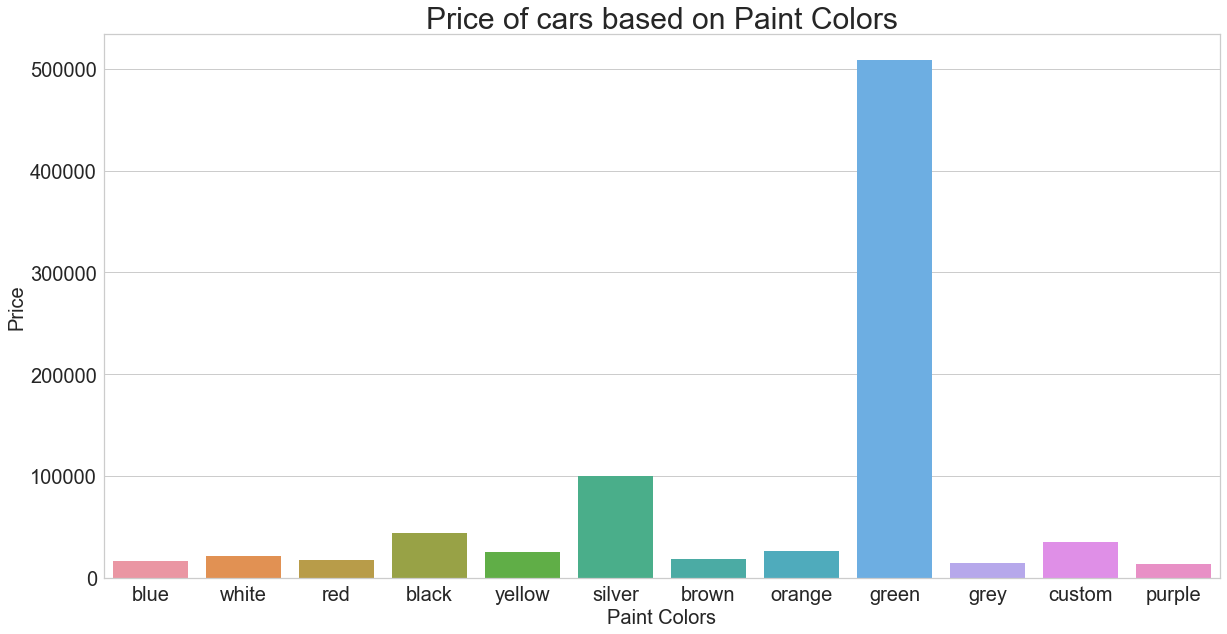

In [11]:
# Price v/s Condition
plt.figure(figsize=(20,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Paint Colors', fontsize=20)
plt.ylabel('Price', fontsize=20)
b =sns.barplot(x=data["paint_color"], y=data['price'], data=data, ci=None)
plt.title('Price of cars based on Paint Colors', fontsize=30)
b.set_xlabel('Paint Colors', fontsize=20)
b.set_ylabel('Price', fontsize=20)

Text(0, 0.5, 'Price')

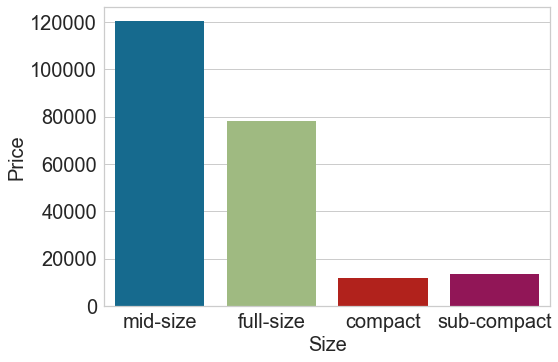

In [12]:
# Size vs Price
#plt.figure(figsize=(9,4))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
b = sns.barplot(x="size", y="price", data=data, ci=None)
b.set_xlabel('Size', fontsize=20)
b.set_ylabel('Price', fontsize=20)

<AxesSubplot:title={'center':'Year Vs Price'}, xlabel='year', ylabel='Increase In price'>

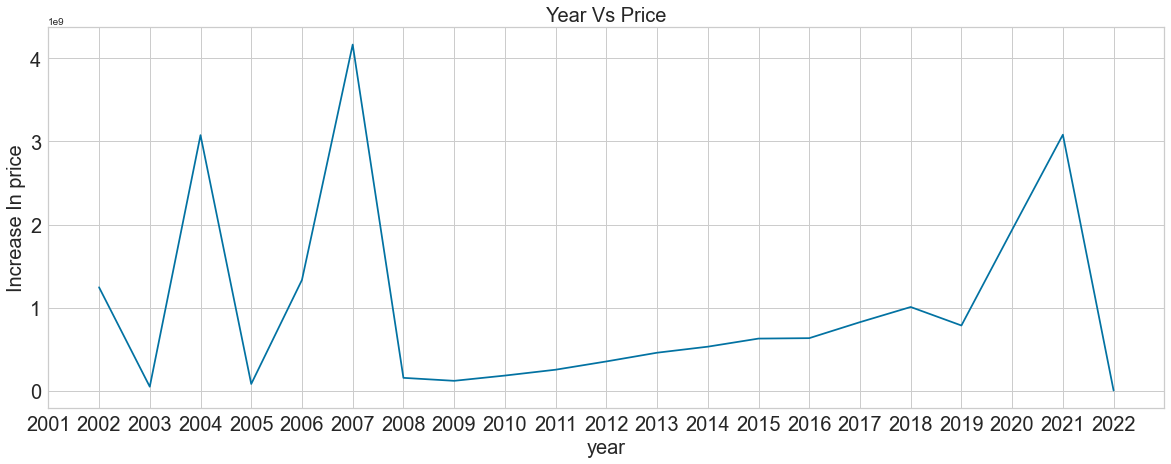

In [13]:
import numpy as np
var =  data[data['year']>2001].groupby('year').price.sum() 
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(1,1,1)
plt.xticks(np.arange(2001, 2023),fontsize=20)
plt.yticks(fontsize=20)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Increase In price',fontsize=20)
ax1.set_title("Year Vs Price",fontsize=20)
var.plot(kind='line')

In [14]:
manf7000 = ['ford', 'chevrolet', 'toyota', 'honda', 'jeep']
vehicles_ca_2020 = data.loc[(data['manufacturer'].isin(manf7000))&(data['state']=='ca')&((data['year']==2020)), :].copy()

<AxesSubplot:xlabel='state', ylabel='manufacturer'>

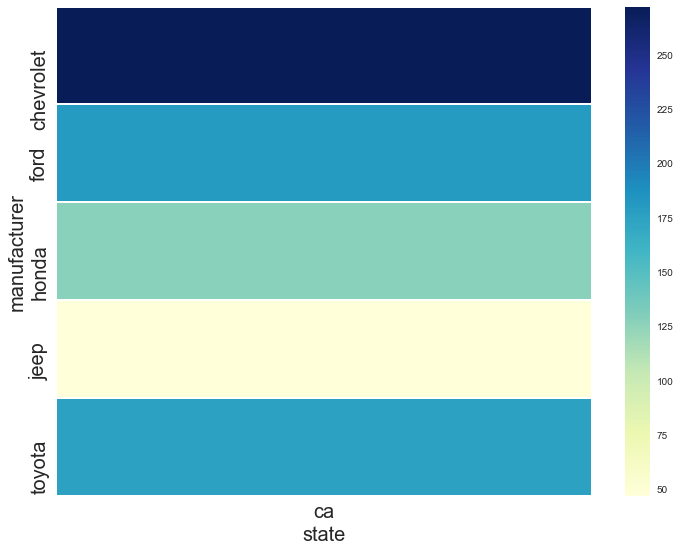

In [15]:
state_ser = vehicles_ca_2020.groupby('manufacturer').state.value_counts()
state_ser_df = pd.DataFrame(state_ser.unstack())

plt.subplots(figsize=(12,9))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('CA, State', fontsize=20)
plt.ylabel('Manufacturer',fontsize=20)
sns.heatmap(state_ser_df, cmap="YlGnBu", linecolor='white', linewidth=1)

Text(78.0, 0.5, 'Year')

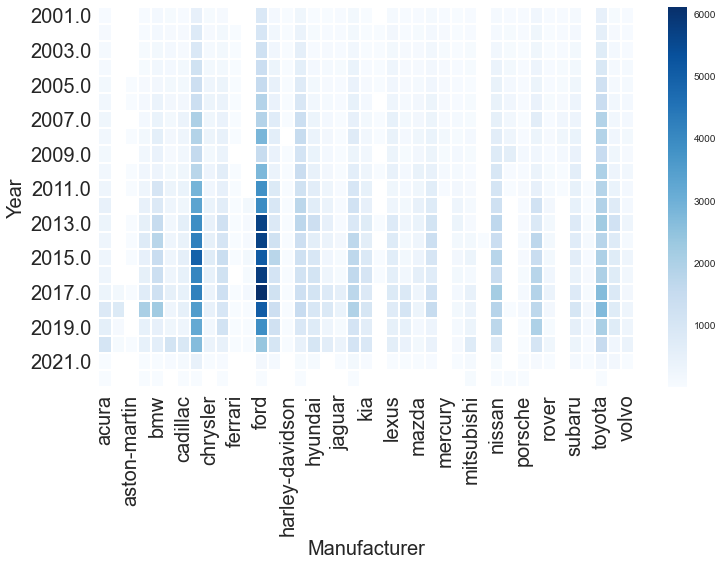

In [16]:
manf = data[data['year']>2000].groupby('year').manufacturer.value_counts()
manf_df = pd.DataFrame(manf.unstack())

plt.subplots(figsize=(12, 7))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
b = sns.heatmap(manf_df, cmap='Blues', linecolor='white', linewidth=1)
b.set_xlabel('Manufacturer', fontsize=20)
b.set_ylabel('Year', fontsize=20)

# Model

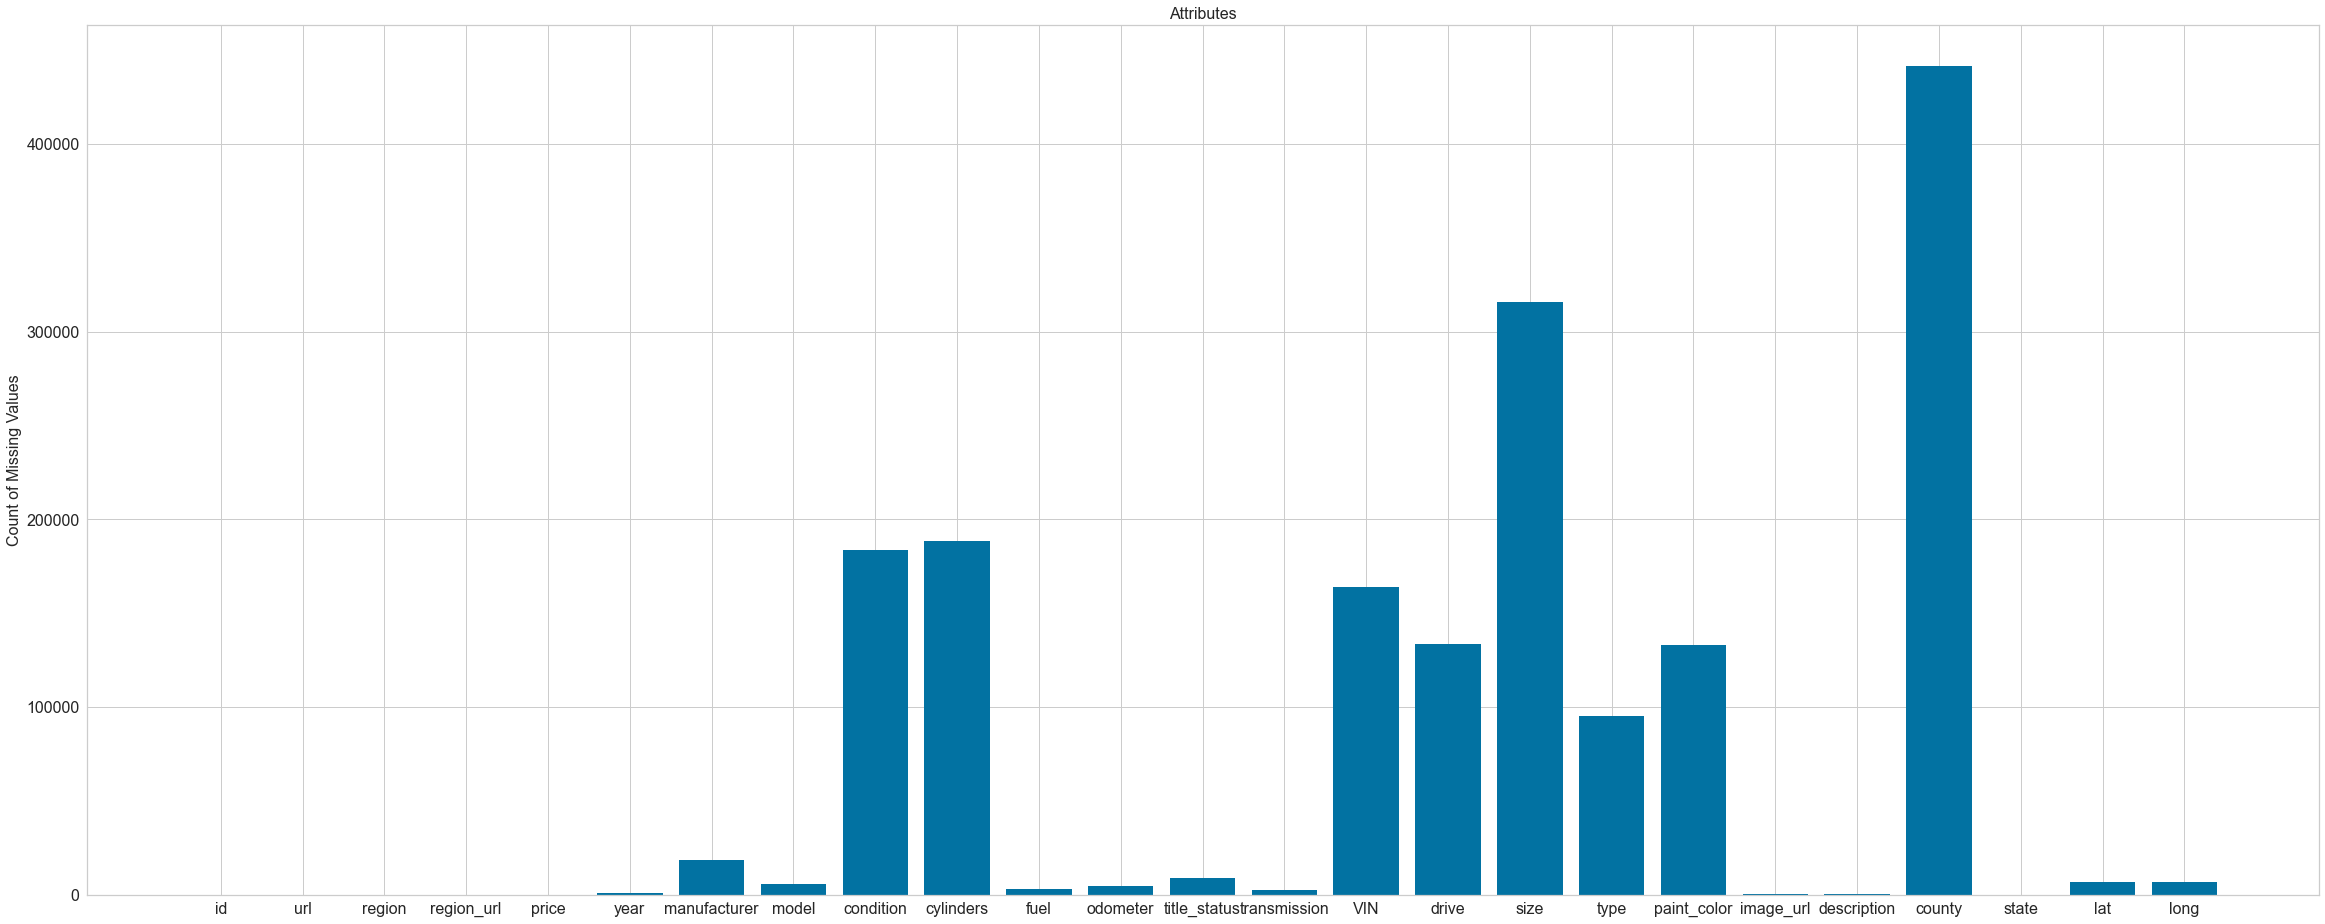

In [17]:
# Count of missing values
null = data.isnull().sum()
plt.figure(figsize=(40, 16))
plt.bar(null.index, null.values);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Count of Missing Values',fontsize=16);
plt.title('Attributes',fontsize=16);

In [18]:
# Drop unwanted columns
drop_attributes = ['id', 'url', 'region_url','model', 'VIN', 'image_url', 'description', 'county','size',
                   'paint_color']
data.drop(drop_attributes, axis=1, inplace=True)

In [19]:
data.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,lat,long
0,auburn,9500,2003.0,chrysler,excellent,6 cylinders,gas,30376.0,clean,automatic,fwd,mini-van,al,32.614209,-85.326357
1,auburn,28990,2018.0,gmc,good,6 cylinders,gas,20736.0,clean,other,fwd,other,al,32.590000,-85.480000
2,auburn,16590,2013.0,lincoln,good,NaN,gas,61087.0,clean,other,fwd,sedan,al,32.590000,-85.480000
3,auburn,28990,2017.0,gmc,good,6 cylinders,gas,18041.0,clean,other,fwd,other,al,32.590000,-85.480000
4,auburn,20590,2017.0,lincoln,good,NaN,gas,36436.0,clean,other,fwd,sedan,al,32.590000,-85.480000


### Handling outlier 

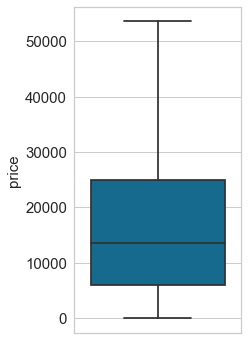

In [20]:
# Checking for price outliers
plt.figure(figsize=(3,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Price', fontsize=15)
sns.boxplot(y='price', data=data,showfliers=False);

In [21]:
# Removing data points with target value: price = 0
data = data[data['price']>0]

In [22]:
data.shape

(407307, 15)

In [23]:
y = data['price']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
removed_outliers
print(removed_outliers.value_counts())

True     366597
False     40710
Name: price, dtype: int64


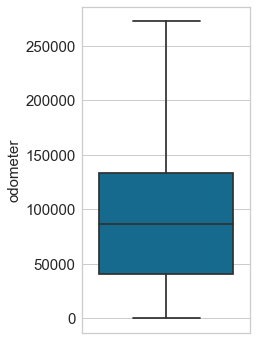

In [24]:
# Checking for outliers in odometer
plt.figure(figsize=(3,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Odometer', fontsize=15)
sns.boxplot(y='odometer', data=data,showfliers=False);

In [25]:
data.isnull().sum()

region               0
price                0
year              1022
manufacturer     16939
condition       160344
cylinders       170111
fuel              2422
odometer          2414
title_status      8389
transmission      1890
drive           122848
type             88251
state                0
lat               3950
long              3950
dtype: int64

In [26]:
# Dropping duplicates
data.drop_duplicates(inplace=True)

In [27]:
data.shape

(356191, 15)

In [28]:
# Removing columns with more than 60% missing values
null_val = data.isnull().sum()
cols = []
for i in null_val.keys():
    if null_val[i]/ data.shape[0]< 0.60:
        cols.append(i)

data_cleaned = data[cols]

In [29]:
data_cleaned.isnull().sum()

region               0
price                0
year               868
manufacturer     15261
condition       131455
cylinders       146015
fuel              2026
odometer          1881
title_status      6974
transmission      1617
drive           106814
type             75160
state                0
lat               3751
long              3751
dtype: int64

In [30]:
# Imputing Categorical Values with mode
enc = ['manufacturer', 'condition', 'cylinders','fuel','title_status', 'transmission', 'drive', 'type']

for i in range(len(enc)):
    val = enc[i]
    data_cleaned[val]=data_cleaned[val].fillna(data_cleaned[val].mode()[0])

In [31]:
# Imputing numerical values with mean
impute = ['year','odometer', 'lat','long']

for i in range(len(impute)):
    val = impute[i]
    data_cleaned[val]=data_cleaned[val].fillna(data_cleaned[val].mean())

In [32]:
le = LabelEncoder()
data_cleaned[['region','manufacturer', 'condition', 'cylinders',
             'fuel','title_status', 'transmission', 'drive', 'type','state']]= data_cleaned[
    ['region','manufacturer', 'condition', 'cylinders',
             'fuel','title_status', 'transmission', 'drive', 'type','state']].apply(le.fit_transform)

In [33]:
data_cleaned

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,lat,long
0,16,9500,2003.0,8,0,5,2,30376.0,0,0,1,5,1,32.614209,-85.326357
1,16,28990,2018.0,14,2,5,2,20736.0,0,2,1,7,1,32.590000,-85.480000
2,16,16590,2013.0,24,2,5,2,61087.0,0,2,1,9,1,32.590000,-85.480000
3,16,28990,2017.0,14,2,5,2,18041.0,0,2,1,7,1,32.590000,-85.480000
4,16,20590,2017.0,24,2,5,2,36436.0,0,2,1,9,1,32.590000,-85.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441391,397,23590,2017.0,18,2,5,2,25738.0,0,0,0,4,50,33.786500,-84.445400
441392,397,16990,2017.0,5,2,5,2,36688.0,0,2,1,9,50,33.786500,-84.445400
441393,397,21590,2013.0,4,2,5,4,44366.0,0,0,2,9,50,33.786500,-84.445400
441394,397,26990,2016.0,4,2,5,4,43934.0,0,2,0,3,50,33.786500,-84.445400


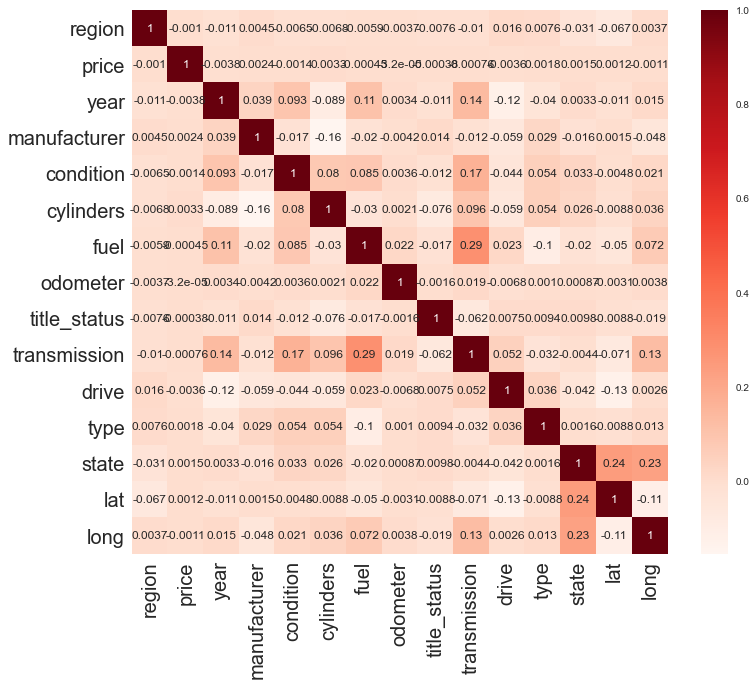

In [34]:
plt.figure(figsize=(12,10))
cor = data_cleaned.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

#### Here from the correlation heatmap, it can be observed that no two attributes show strong correlation. Attributes like manufacturer and cylinder show negative correlation whereas attributes like fuel and transmission show positive correlation. However, there are no significant correlations between features, hence it is imperative to train the model with all features. 

In [50]:
y = data_cleaned['price']
data_cleaned.drop('price', axis=1, inplace=True)

### Scaling the dataset

In [51]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(data_cleaned)

### Train-Test Split

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state= 0)

### Linear Regression

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)
print("R2_Score: ", r2_score(y_test,y_lr))

R2_Score:  -0.00020313676915373335


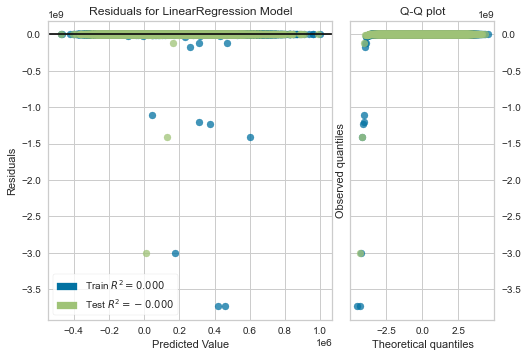

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [54]:
visualizer1 = ResidualsPlot(lr, hist=False, qqplot=True)
visualizer1.fit(X_train, y_train)
visualizer1.score(X_test, y_test)
visualizer1.show()

#### As we see from above figure, linear regression performs better on the training data than on the testing data. The r2 score for testing data being negative and zero depicts that the data is non-linear and does not follow any particular pattern/ trend. 

### Ridge Regression

In [55]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)
print("R2_Score: ", r2_score(y_test,y_ridge))

R2_Score:  -0.00020313514345393635


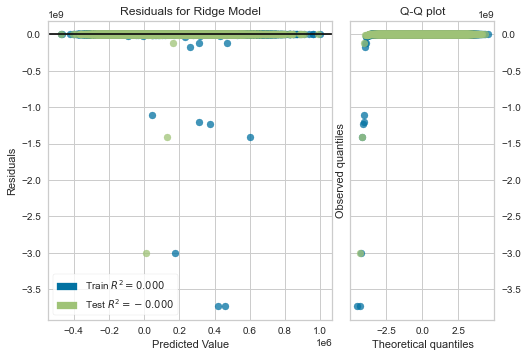

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [56]:
visualizer1 = ResidualsPlot(ridge, hist=False, qqplot=True)
visualizer1.fit(X_train, y_train)
visualizer1.score(X_test, y_test)
visualizer1.show()

#### Just like linear regression, ridge regression also depicts no correlation between the attributes. This is possible since the data is not normally distributed across the horizontal black line. 

### Lasso Regresison

In [57]:
ls = Lasso()
ls.fit(X_train, y_train)
y_ls = ridge.predict(X_test)
print("R2_Score: ",r2_score(y_test,y_ls))

R2_Score:  -0.00020313514345393635


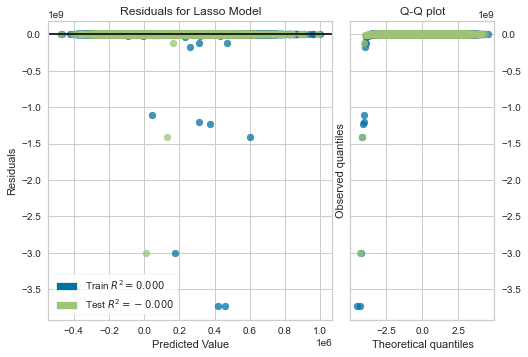

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [58]:
visualizer1 = ResidualsPlot(ls, hist=False, qqplot=True)
visualizer1.fit(X_train, y_train)
visualizer1.score(X_test, y_test)
visualizer1.show()

#### Lasso Regression has also not shown any promising results for the used cars dataset. 

### Random Forest Regressor

In [60]:
rfr =  RandomForestRegressor()
rfr.fit(X_train,y_train)
y_rfr = rfr.predict(X_test)

In [61]:
print("R2_Score: ", r2_score(y_test,y_rfr))

R2_Score:  -0.17902881264464576


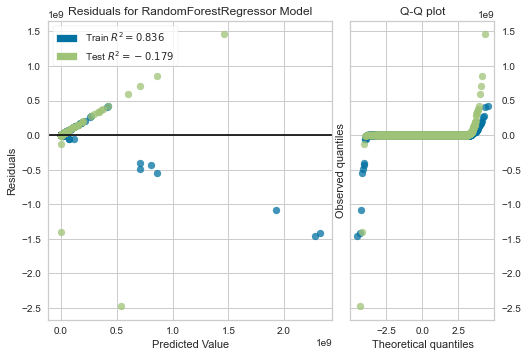

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [62]:
visualizer1 = ResidualsPlot(rfr, hist=False, qqplot=True)
visualizer1.fit(X_train, y_train)
visualizer1.score(X_test, y_test)
visualizer1.show()

#### Here, random forest regression has performed well on the training data with an r2_score of 0.844, whereas performance has worsened on the test set. Also, from the Q-Q plot, it is seen that at the ends of the horizontal line the data points curve off, reflecting the extreme values in the datasets. 

### XGBRegressor

In [63]:
xgbr = XGBRegressor()
xgbr.fit(X_train,y_train)
y_xgbr = xgbr.predict(X_test)
print("R2_Score: ",r2_score(y_test,y_xgbr))

R2_Score:  -1.4157070624737873


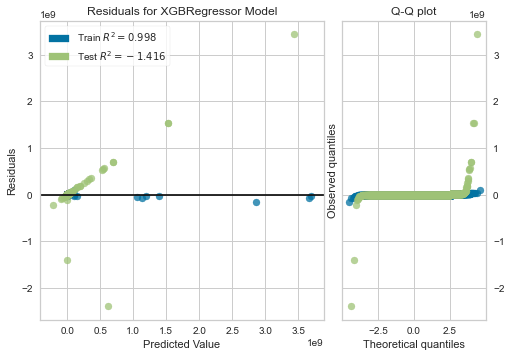

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [64]:
visualizer1 = ResidualsPlot(xgbr, hist=False, qqplot=True)
visualizer1.fit(X_train, y_train)
visualizer1.score(X_test, y_test)
visualizer1.show()

#### XGBRegressor has performed extremely well with an r2_score= 0.998 on the training data, however, it has not been able to perform on the new data points coming from the testing data. Also, it can be observed from the Q-Q plot that the curve at the ends of the horizontal axis is not sharp compared to the Random Forest Regressor. 

### KNN Regressor

In [65]:
knn_r = KNeighborsRegressor()
knn_r.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [67]:
y_knn_r = knn_r.predict(X_test)
print("R2_Score: ",r2_score(y_test,y_knn_r))

R2_Score:  -0.11731544080405865


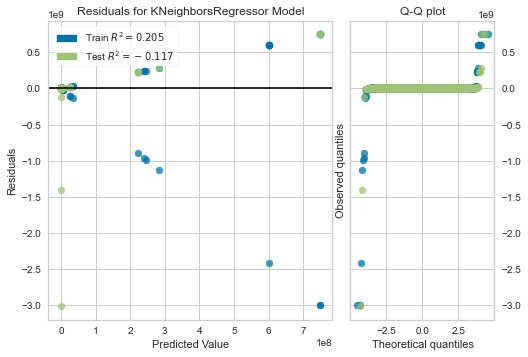

<AxesSubplot:title={'center':'Residuals for KNeighborsRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [68]:
visualizer1 = ResidualsPlot(knn_r, hist=False, qqplot=True)
visualizer1.fit(X_train, y_train)
visualizer1.score(X_test, y_test)
visualizer1.show()

#### From the above Q-Q plot of KNeighborsRegressor, it can be seen that the data points are further distant on the extreme ends, as compared to what was observed in Random Forest Regressor and XGBRegressor. 

### Polynomial Features with Linear Regression

In [69]:
poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr.fit(X_train_poly,y_train)
y_poly_lr = lr.predict(X_test_poly)
print("R2_score: ",r2_score(y_poly_lr, y_test))

R2_score:  -229.9049989079235


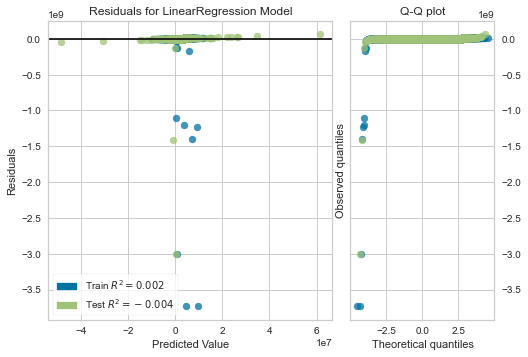

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [70]:
visualizer1 = ResidualsPlot(lr, hist=False, qqplot=True)
visualizer1.fit(X_train_poly, y_train)
visualizer1.score(X_test_poly, y_test)
visualizer1.show()

#### From the above figure, we see that the training data points are further down the negative axis. It means that the predicted values are much more than the actual values, hence the data point moved in the negative direction. 

# Conclusion

#### From the evaluation analysis, it can be said that the datapoints show non-linearity. Also, the models have failed to perform well. 
#### It would be essential to look out for more attributes that are useful for price prediction of used cars. Implementation of various other regression models should be helpful for getting a favorable model for this dataset. 